In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# If True, test is running on Colab. Otherwise, test if assumed to be offline.
TEST_ON_COLAB = False
FOLDERNAME = None  # only used if TEST_ON_COLAB is True

assert not (FOLDERNAME is None and TEST_ON_COLAB), "FOLDERNAME has to be set if TEST_ON_COLAB is True"

# Atividade de programação 2 (AP2)
## Multi-layer perceptron: 20 pontos

Responda as questões indicadas e preencha os campos indicados com o tag `TODO`.

### Parte I: Preparação dos dados

Reutilize o código da atividade anterior para carregar os dados.

In [18]:
# TODO: Set the dataset ID ####
DATASET_OPENML_ID = None
###############################

# TODO: Is your dataset an image dataset? #
IS_IMAGE_DATASET = None
###########################################

assert DATASET_OPENML_ID is not None, "DATASET_OPENML_ID is not set"
assert IS_IMAGE_DATASET is not None, "IS_IMAGE_DATASET is not set"

Download do dataset:

In [19]:
# Create dataset directory

import os

if TEST_ON_COLAB:
    # This mounts your Google Drive to the Colab VM.
    from google.colab import drive

    drive.mount("/content/drive")
    cache_dir = f"/content/drive/My Drive/{FOLDERNAME}/dataset/{DATASET_OPENML_ID}"
else:
    cache_dir = f"dataset/{DATASET_OPENML_ID}"

os.makedirs(cache_dir, exist_ok=True)

# Fetching the dataset
from sklearn.datasets import fetch_openml
import numpy as np

X_file_path = f"{cache_dir}/X.npy"
y_file_path = f"{cache_dir}/y.npy"

# Check if the dataset files already exist
if not (os.path.exists(X_file_path) and os.path.exists(y_file_path)):
    # Fetch the dataset where X is the data and y is the target
    X, y = fetch_openml(DATASET_OPENML_ID, as_frame=False, cache=True, return_X_y=True)

    # Save the dataset as numpy arrays
    np.save(X_file_path, X.astype(np.float32))
    np.save(y_file_path, y)
    print(f"{DATASET_OPENML_ID} dataset downloaded and saved successfully to {cache_dir}.")
else:
    X = np.load(X_file_path, allow_pickle=True)
    y = np.load(y_file_path, allow_pickle=True)
    print(f"{DATASET_OPENML_ID} dataset already exists in {cache_dir}. Skipping download.")


# Preprocess the dataset
if IS_IMAGE_DATASET:
    X = X / 255.0

print(X.shape)
print(X.min(), X.max())

mnist_784 dataset already exists in dataset/mnist_784. Skipping download.
(70000, 784)
0.0 1.0


A seguir, são calculados: o número de classes do dataset e o número de features.

In [20]:
num_classes = len(np.unique(y)) # Number of classes in the dataset
num_features = X.shape[1] # Number of features in the dataset

Visualizando algumas amostras do dataset:

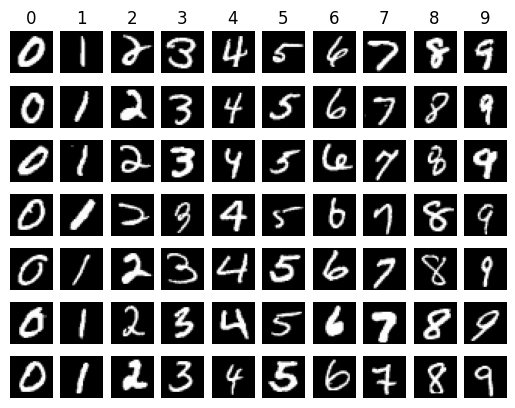

In [21]:
if IS_IMAGE_DATASET:
    import matplotlib.pyplot as plt

    # Visualize some examples from the dataset.
    # We show a few examples of training images from each class.
    classes = [int(class_id) for class_id in np.unique(y)]
    samples_per_class = 7
    for cls in classes:
        idxs = np.flatnonzero(y == str(cls))
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + cls + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            img = X[idx].reshape((28, -1))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

**1. (2 pontos)** Utilize a função `train_test_split` do módulo `sklearn.model_selection` para dividir o conjunto de dados (`X` e `y`) em treino (80%), validação (10%) e teste (10%). O conjunto de validação será utilizado exclusivemente na última questão (ponto extra).

In [22]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
SEED = 42

# Convert labels from string to integer
y = y.astype(int)

# TODO: Split the dataset into train, test, and validation sets #
X_train, X_test, y_train, y_test = None, None, None, None
X_val, X_test, y_val, y_test = None, None, None, None
#################################################################

assert X_train is not None, "X_train is not set"
assert y_train is not None, "y_train is not set"
assert X_val is not None, "X_val is not set"
assert y_val is not None, "y_val is not set"
assert X_test is not None, "X_test is not set"
assert y_test is not None, "y_test is not set"

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 63000
Validation set size: 3500
Test set size: 3500


**2. (5 pontos)** Padronize os dados de entrada para que cada feature tenha média 0 e desvio padrão 1. Dica: utilize o `StandardScaler` do `sklearn`. Verifique a [documentação](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html) da biblioteca para entender como utilizar essa funcionalidade. Ao final, adicione a coluna de bias ao conjunto de dados de treino, validação e teste.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# TODO: Fit the scaler on the training data and transform the training, validation, and test data #
X_train_scaled = None
X_val_scaler = None
X_test_scaler = None
##################################################################################################

assert X_train_scaled is not None, "X_train_scaled is not set"
assert X_val_scaler is not None, "X_val_scaler is not set"
assert X_test_scaler is not None, "X_test_scaler is not set"

# Ensure that the standard deviation of the features is close to 1
stds =  X_train_scaled.std(axis=0)   
idx_pos = stds == 0 # where the standard deviation is zero
idxs_one = abs(1 - stds) < 1.e-02 # where the standard deviation is close to one
assert np.logical_or(idx_pos, idxs_one).all()

# TODO: Add bias to the data #
X_train_bias = None
X_val_bias = None
X_test_bias = None
##############################

assert X_train_bias is not None, "X_train_bias is not set"
assert X_val_bias is not None, "X_val_bias is not set"
assert X_test_bias is not None, "X_test_bias is not set"

# Ensure that the bias term is added correctly
assert X_train_bias.shape[1] == num_features + 1, "X_train does not have the correct shape"
assert X_test_bias.shape[1] == num_features + 1, "X_test does not have the correct shape"

### Parte II: Treinamento e Teste

Nesta parte da atividade, abordaremos o treinamento e teste de um modelo MLP.

**3. (5 pontos)** Defina um classificador [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) com os seguintes hiperparâmetros:

- Camada oculta com 64 neurônios e função de ativação ReLU.
- Número máximo de épocas de 100.
- Batch size de 32.
- Taxa de aprendizado de 0.001.
- Early stopping com `n_iter_to_change=10`.

Os demais hiperparâmetros devem ser mantidos com os valores padrão. Para acompanhar o treinamento, utilize o parâmetro `verbose=True`.

In [24]:
from sklearn.neural_network import MLPClassifier

# TODO: Create a neural network model #
model = None
#######################################

assert model is not None, "model is not set"

**4. (1 ponto)** A seguir, treine o modelo utilizando o conjunto de treino. Neste caso, o conjunto de validação é definido implicitamente pelo parâmetro `validation_fraction=0.1`. O conjunto `X_val` e `y_val` não são necessários, por enquanto.

In [25]:
# TODO: Train the model on the training data #
pass
##############################################

Iteration 1, loss = 0.25972029
Validation score: 0.953651
Iteration 2, loss = 0.11422306
Validation score: 0.961429
Iteration 3, loss = 0.08085943
Validation score: 0.968730
Iteration 4, loss = 0.05891462
Validation score: 0.967302
Iteration 5, loss = 0.04710681
Validation score: 0.967302
Iteration 6, loss = 0.03867262
Validation score: 0.965714
Iteration 7, loss = 0.03211671
Validation score: 0.965873
Iteration 8, loss = 0.02712880
Validation score: 0.968730
Iteration 9, loss = 0.02296816
Validation score: 0.966032
Iteration 10, loss = 0.02119765
Validation score: 0.967460
Iteration 11, loss = 0.01863678
Validation score: 0.969048
Iteration 12, loss = 0.02205836
Validation score: 0.969683
Iteration 13, loss = 0.01734517
Validation score: 0.967143
Iteration 14, loss = 0.01690546
Validation score: 0.969048
Iteration 15, loss = 0.01068291
Validation score: 0.966508
Iteration 16, loss = 0.01149866
Validation score: 0.969841
Iteration 17, loss = 0.01357105
Validation score: 0.964921
Iterat

MLPClassifier(batch_size=32, early_stopping=True, hidden_layer_sizes=(64,),
              max_iter=100, random_state=42, verbose=True)

#### Resultados (inferência)

**5. (1 ponto)** Realize a inferência do modelo treinado no conjunto de teste.

In [69]:
# TODO: Evaluate the model on the test data #
y_pred = None
#############################################

assert y_pred is not None, "y_pred is not set"

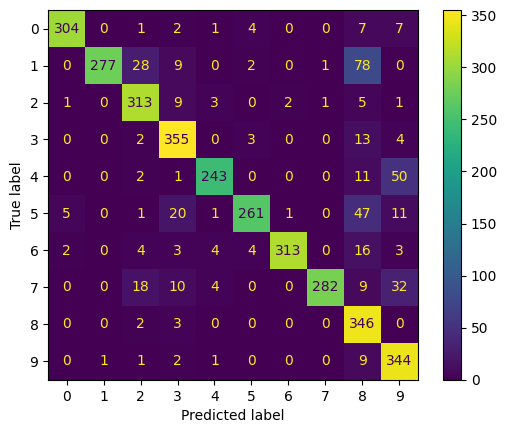


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       326
           1       1.00      0.70      0.82       395
           2       0.84      0.93      0.89       335
           3       0.86      0.94      0.90       377
           4       0.95      0.79      0.86       307
           5       0.95      0.75      0.84       347
           6       0.99      0.90      0.94       349
           7       0.99      0.79      0.88       355
           8       0.64      0.99      0.78       351
           9       0.76      0.96      0.85       358

    accuracy                           0.87      3500
   macro avg       0.90      0.87      0.87      3500
weighted avg       0.89      0.87      0.87      3500



In [14]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

### Parte III: Grid search

Nesta parte da atividade, abordaremos a busca exaustiva de parâmetros (grid search).

**6. (5 pontos)** Defina o espaço de hiperparâmetros para implementação do grid search de acordo com as seguintes especificações:

- Camada oculta com 64, 128 e 256 neurônios.
- Função de ativação ReLU e tanh.
- Otimizador Adam e SGD.
- Taxa de aprendizado de 0.01, 0.001 e 0.0001.
- Batch size de 32.
- Número máximo de épocas de 100.
- Early stopping com `n_iter_to_change=10`.

Os demais hiperparâmetros devem ser mantidos com os valores padrão. Para acompanhar o treinamento, utilize o parâmetro `verbose=True`.

In [ ]:
from sklearn.model_selection import GridSearchCV

# TODO: Set the parameters by cross-validation
parameters = None
##############################################

assert parameters is not None, "parameters is not set"

model = MLPClassifier(random_state=SEED, verbose=True)
gs = GridSearchCV(model, parameters, cv=5)
gs.fit(X_train_scaled, y_train)
print(gs.best_params_)

Iteration 1, loss = 0.28601838
Validation score: 0.944048
Iteration 2, loss = 0.12334190
Validation score: 0.958929
Iteration 3, loss = 0.08650059
Validation score: 0.960317
Iteration 4, loss = 0.06326864
Validation score: 0.963690
Iteration 5, loss = 0.04993386
Validation score: 0.966667
Iteration 6, loss = 0.03881376
Validation score: 0.965079
Iteration 7, loss = 0.03177786
Validation score: 0.968849
Iteration 8, loss = 0.02837153
Validation score: 0.963095
Iteration 9, loss = 0.02207251
Validation score: 0.970437
Iteration 10, loss = 0.02042476
Validation score: 0.969643
Iteration 11, loss = 0.01560599
Validation score: 0.969643
Iteration 12, loss = 0.01749239
Validation score: 0.970635
Iteration 13, loss = 0.01598904
Validation score: 0.967857
Iteration 14, loss = 0.01518113
Validation score: 0.971825
Iteration 15, loss = 0.01128633
Validation score: 0.970635
Iteration 16, loss = 0.01059423
Validation score: 0.970040
Iteration 17, loss = 0.01662545
Validation score: 0.968056
Iterat

#### Resultados (inferência)

**7. (1 ponto)** Realize a inferência do modelo treinado no conjunto de teste.

In [12]:
# TODO: Evaluate the model on the test data #
y_pred = None
#############################################

assert y_pred is not None, "y_pred is not set"

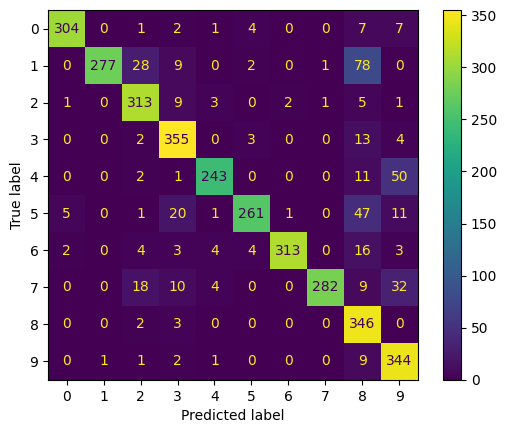


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       326
           1       1.00      0.70      0.82       395
           2       0.84      0.93      0.89       335
           3       0.86      0.94      0.90       377
           4       0.95      0.79      0.86       307
           5       0.95      0.75      0.84       347
           6       0.99      0.90      0.94       349
           7       0.99      0.79      0.88       355
           8       0.64      0.99      0.78       351
           9       0.76      0.96      0.85       358

    accuracy                           0.87      3500
   macro avg       0.90      0.87      0.87      3500
weighted avg       0.89      0.87      0.87      3500



In [15]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)

**8. (2 pontos extra)** Implemente o grid search do modelo MLP utilizando como conjunto de validação `X_val`. Dica: pesquise por [PredefinedSplit](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html#sklearn.model_selection.PredefinedSplit.)

In [73]:
# TODO: Grid search #
pass
#####################